   Unnamed: 0     TV  Radio  Newspaper  Sales
0           1  230.1   37.8       69.2   22.1
1           2   44.5   39.3       45.1   10.4
2           3   17.2   45.9       69.3    9.3
3           4  151.5   41.3       58.5   18.5
4           5  180.8   10.8       58.4   12.9
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB
None
       Unnamed: 0          TV       Radio   Newspaper       Sales
count  200.000000  200.000000  200.000000  200.000000  200.000000
mean   100.500000  147.042500   23.264000   30.554000   14.022500
std     57.879185   85.854236   14.846809   21.778621    5.217457
min      1.000

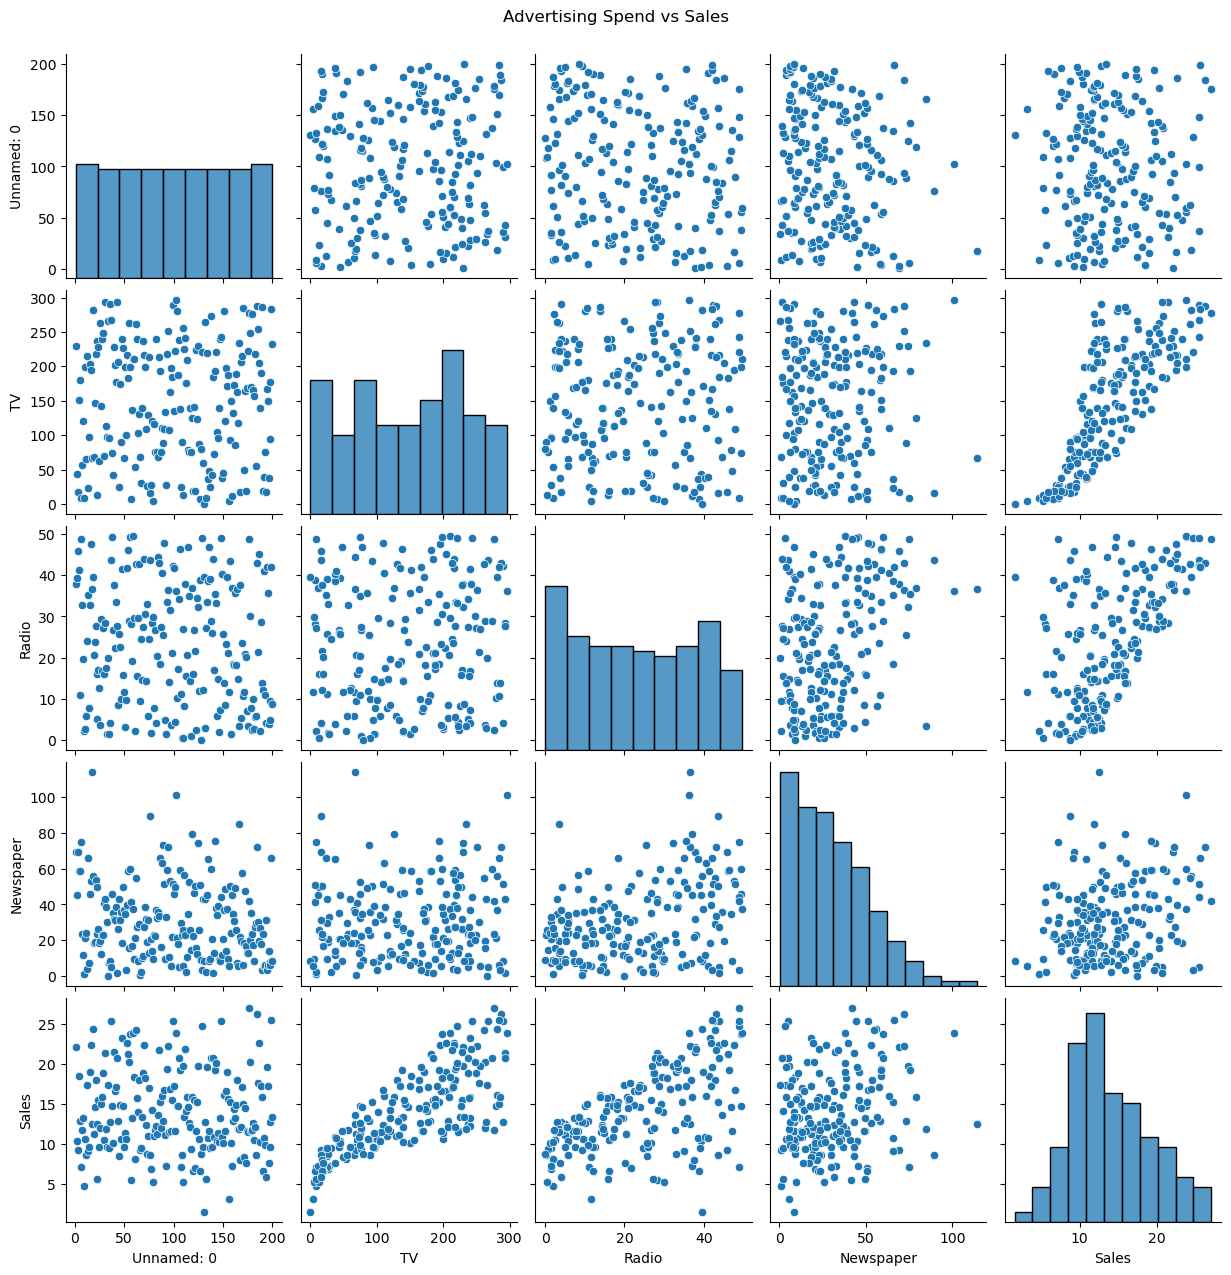

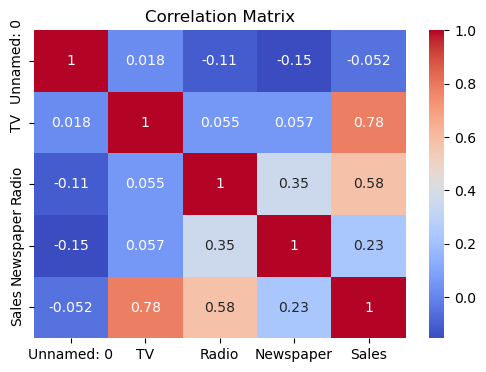


🔍 Model Evaluation:
Root Mean Squared Error (RMSE): 1.78
R² Score: 0.90


C:\Users\husna\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


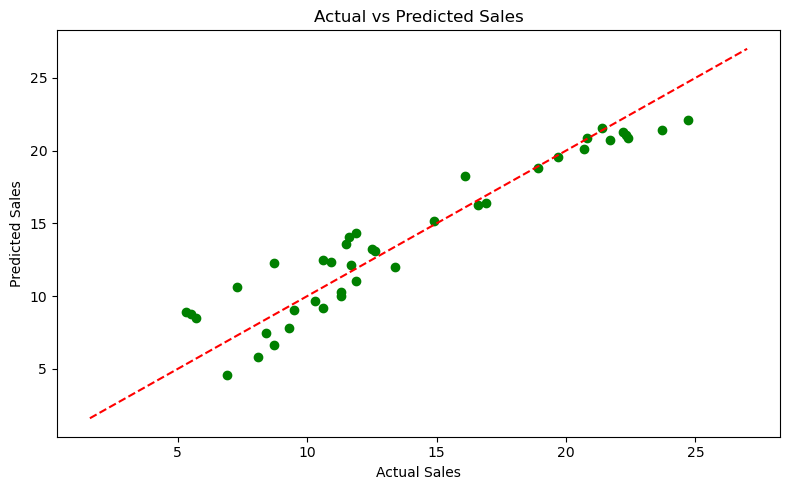


📊 Feature Influence on Sales:
     Feature  Coefficient
0         TV     0.044730
1      Radio     0.189195
2  Newspaper     0.002761


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Step 1: Load data
df = pd.read_csv("advertising.csv")

# Step 2: Basic exploration
print(df.head())
print(df.info())
print(df.describe())

# Step 3: Check for missing values
print("\nMissing values:\n", df.isnull().sum())

# Step 4: Visualize relationships
sns.pairplot(df)
plt.suptitle("Advertising Spend vs Sales", y=1.02)
plt.show()

# Step 5: Correlation heatmap
plt.figure(figsize=(6,4))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

# Step 6: Define features and target
X = df[['TV', 'Radio', 'Newspaper']]  # independent variables
y = df['Sales']                       # target

# Step 7: Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 8: Train a regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Step 9: Predict and evaluate
y_pred = model.predict(X_test)

# Model evaluation
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print(f"\n🔍 Model Evaluation:")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R² Score: {r2:.2f}")

# Step 10: Visualize predictions
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred, color='green')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')  # ideal line
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Actual vs Predicted Sales")
plt.tight_layout()
plt.show()

# Step 11: Coefficients (Insights)
coeff_df = pd.DataFrame({'Feature': X.columns, 'Coefficient': model.coef_})
print("\n📊 Feature Influence on Sales:")
print(coeff_df)

